# Notebook #1: Your Dishwasher is Very Disappointed In You.

My goal is to make a machine learning model that will:

- detect the cutlery tray of my dishwasher in photos (maybe video too, someday);
- pick out any cutlery or utensils in the various sections of the tray;
- know roughly where it is in the tray;
- and be able to offer advice and criticism about where it should _really_ go.

I plan on doing this by:

- creating and annotating my own dataset (pictures of my dishwasher with varying amounts of cutlery in the tray);
- using PyTorch to do transfer learning on that dataset, using one of the 10e9 object detection models out there;
- and deploying it to an NVidia Jetson Nano.

Let's see how far I can get!

# The dataset

The dataset is, on my laptop, two directories up and one over:

In [25]:
!ls -l ../../dishwasher_training_data/sorted/train/not_empty | head

total 84544
-rw-r--r--. 1 aardvark aardvark 2300318 Sep  7 20:08 20-09-07 13-08-44 9699.jpg
-rw-r--r--. 1 aardvark aardvark 2331329 Sep  7 20:08 20-09-07 13-08-47 9700.jpg
-rw-r--r--. 1 aardvark aardvark 2139853 Sep  7 20:08 20-09-07 13-08-56 9701.jpg
-rw-r--r--. 1 aardvark aardvark 2132162 Sep  7 20:08 20-09-07 13-08-58 9702.jpg
-rw-r--r--. 1 aardvark aardvark 2349855 Sep  7 20:09 20-09-07 13-09-09 9703.jpg
-rw-r--r--. 1 aardvark aardvark 2504619 Sep  7 20:09 20-09-07 13-09-10 9704.jpg
-rw-r--r--. 1 aardvark aardvark 2287867 Sep  7 20:09 20-09-07 13-09-17 9705.jpg
-rw-r--r--. 1 aardvark aardvark 2403636 Sep  7 20:09 20-09-07 13-09-17 9706.jpg
-rw-r--r--. 1 aardvark aardvark 2165466 Sep  7 20:09 20-09-07 13-09-43 9707.jpg


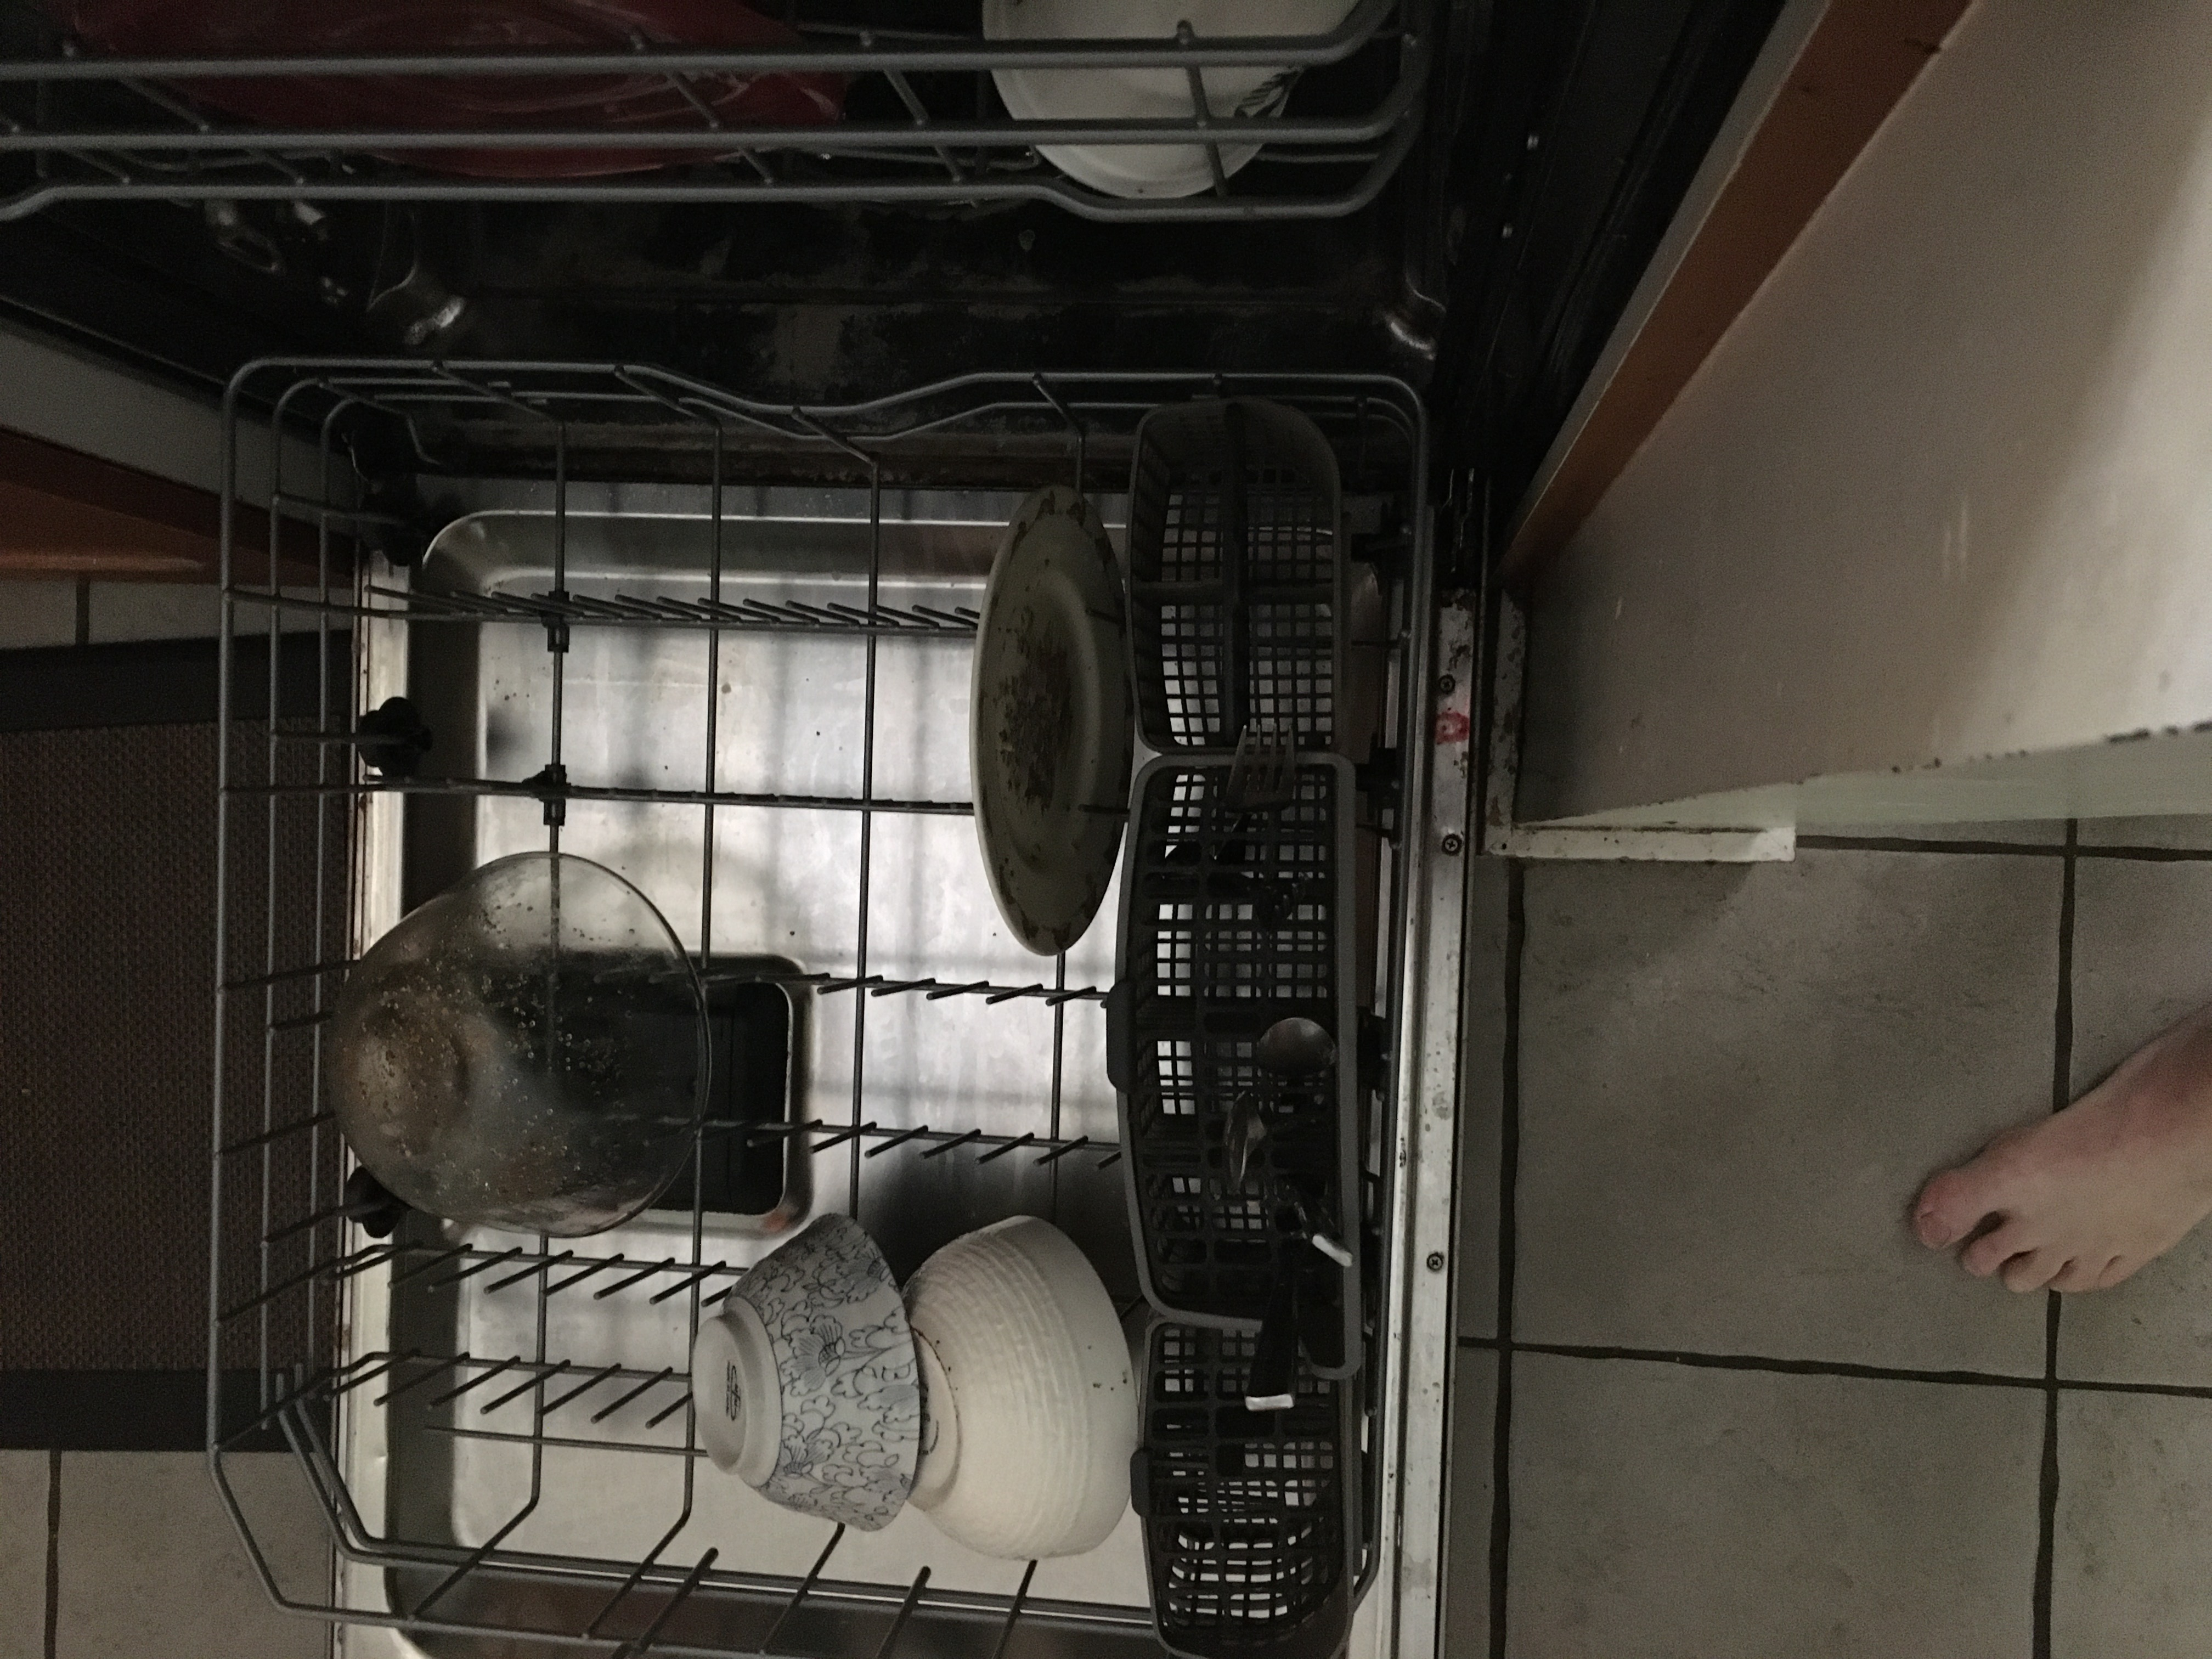

In [24]:
from pathlib import Path

from IPython.display import Image


dataset_root = Path('../../dishwasher_training_data/sorted/')
training_empty = dataset_root / 'train/empty'
training_not_empty = dataset_root/'train/not_empty'
Image(filename=training_not_empty/'20-09-07 13-08-44 9699.jpg') 

# The process

As I currently understand it, the process is:

- Take a bunch of pictures like this (✓, but the more the merrier)
  - Don't forget pictures of the tray when it's empty! ✓
- Annotate them by using one of the 100 different tools to draw bounding boxes around what I want to detect
- Download those annotations & store them by the data
- ~~Train~~Fine-tune the model by pointing it at those pictures and the annotations
- Validate, infer, etc etc

# The tool

[makesense.ai](https://makesense.ai) seems like a good way to go here: it's browser-based, it's Free as in Freedom, and offers output in three formats:

- YOLO zip file
- VOC XML
- plain ol' CSV

# Now what?

One thing I'm having trouble finding is how to get PyTorch to fine tune a model based on your own custom dataset, rather than one of the already-existing datasets out there.  

## Detecto

One library I've found that promises to help with this is Detecto:

- [Medium article](https://medium.com/pytorch/detecto-build-and-train-object-detection-models-with-pytorch-5f31b68a8109)
- [Github repo](https://github.com/alankbi/detecto)
- [Docs](https://github.com/alankbi/detecto)

However: I appreciate the appeal of "it's only 5 lines of code!", but I also want to know what's going on under the hood.  

## Pytorch Documentation

https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html